Saving WineComponent8.csv to WineComponent8 (1).csv
Dataset Loaded Successfully
   Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Pr

<ipython-input-5-30a0c07c5bc8>:62: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(pca_transformed[:, 0], pca_transformed[:, 1], pca_transformed[:, 2], cmap='viridis')


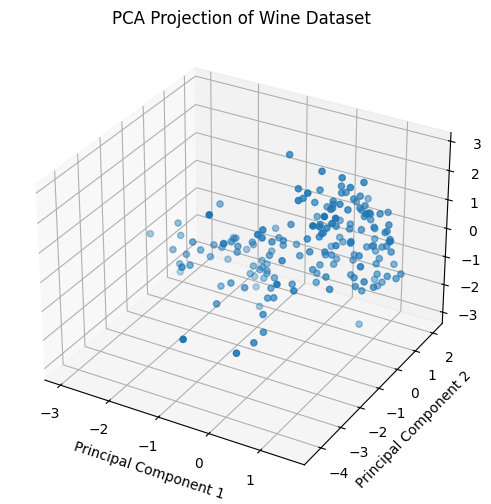


Final Output: Top 3 Eigenvalues
 [9.92017895e+04 1.72535266e+02 9.43811370e+00]


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from google.colab import files

# Upload the CSV file
uploaded = files.upload()

# Load the dataset (assuming file is named 'WineComponent.csv')
df = pd.read_csv(next(iter(uploaded)))
print("Dataset Loaded Successfully")
print(df.head())

# Exclude the 'Customer_Segment' column if it exists
if 'Customer_Segment' in df.columns:
    features = df.drop(columns=['Customer_Segment'])
else:
    features = df.copy()

# Step 1: Calculate the average of all 13 attributes
attribute_means = features.mean()
print("\nStep 1: Average of all 13 attributes\n", attribute_means)

# Step 2: Calculate variances and compute the covariance matrix
attribute_variances = features.var()
cov_matrix = np.cov(features.T)
print("\nStep 2: Variances of all attributes\n", attribute_variances)
print("\nStep 2: Covariance Matrix\n", cov_matrix)

# Standardizing the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


# Step 3: Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print("\nStep 3: Eigenvalues\n", eigenvalues)
print("\nStep 3: Eigenvectors\n", eigenvectors)

# Step 4: Sort eigenvalues and take the top 3
sorted_indices = np.argsort(eigenvalues)[::-1]  # Sort in descending order

# Instead of printing sorted_indices, print sorted eigenvalues:
print("\nSorted Eigenvalues (Descending Order):\n", eigenvalues[sorted_indices])


top_3_indices = sorted_indices[:3]

top_3_eigenvectors = eigenvectors[:, top_3_indices]
print("\nStep 4: Top 3 Eigenvalues\n", eigenvalues[top_3_indices])
print("\nStep 4: Top 3 Eigenvectors\n", top_3_eigenvectors)

# Transform the data
pca_transformed = np.dot(scaled_features, top_3_eigenvectors)
print("\nStep 5: Revised values in 3 dimensions\n", pca_transformed[:5])

# Step 5: Plot the PCA results
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_transformed[:, 0], pca_transformed[:, 1], pca_transformed[:, 2], cmap='viridis')

ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
ax.set_title("PCA Projection of Wine Dataset")

plt.show()

# Display final results
print("\nFinal Output: Top 3 Eigenvalues\n", eigenvalues[top_3_indices])


Saving WineComponent8.csv to WineComponent8 (4).csv
Dataset Loaded Successfully

Step 1: Average of all 13 attributes
 Alcohol                  13.000618
Malic_Acid                2.336348
Ash                       2.366517
Ash_Alcanity             19.494944
Magnesium                99.741573
Total_Phenols             2.295112
Flavanoids                2.029270
Nonflavanoid_Phenols      0.361854
Proanthocyanins           1.590899
Color_Intensity           5.058090
Hue                       0.957449
OD280                     2.611685
Proline                 746.893258

Step 2: Variances of all attributes
 Alcohol                     0.659062
Malic_Acid                  1.248015
Ash                         0.075265
Ash_Alcanity               11.152686
Magnesium                 203.989335
Total_Phenols               0.391690
Flavanoids                  0.997719
Nonflavanoid_Phenols        0.015489
Proanthocyanins             0.327595
Color_Intensity             5.374449
Hue               

<ipython-input-9-741ef7e7912a>:68: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(pca_transformed[:, 0], pca_transformed[:, 1], pca_transformed[:, 2], cmap='viridis')


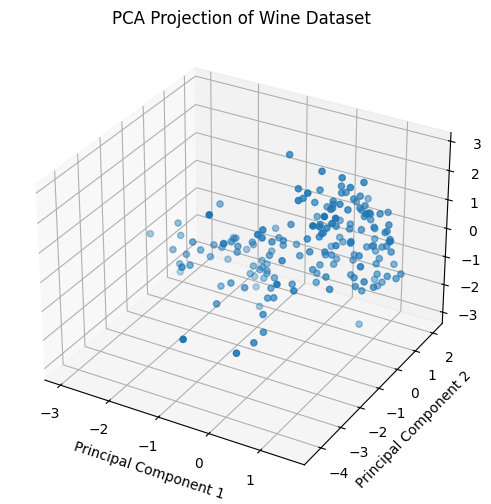


Final Output: Top 3 Eigenvalues

              0
0  99201.789517
1    172.535266
2      9.438114


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from google.colab import files

# Upload the CSV file
uploaded = files.upload()

# Load the dataset (assuming file is named 'WineComponent.csv')
df = pd.read_csv(next(iter(uploaded)))
print("Dataset Loaded Successfully")
# print(df.head())

# Exclude the 'Customer_Segment' column if it exists
if 'Customer_Segment' in df.columns:
    features = df.drop(columns=['Customer_Segment'])
else:
    features = df.copy()

# Step 1: Calculate the average of all 13 attributes
attribute_means = features.mean()
print("\nStep 1: Average of all 13 attributes\n", attribute_means.to_string())

# Step 2: Calculate variances and compute the covariance matrix
attribute_variances = features.var()
cov_matrix = np.cov(features.T)
print("\nStep 2: Variances of all attributes\n", attribute_variances.to_string())
print("\nStep 2: Covariance Matrix\n")
print(pd.DataFrame(np.round(cov_matrix, 6)))

# Standardizing the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 3: Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print("\nStep 3: Eigenvalues\n")
print(pd.DataFrame(np.round(eigenvalues, 6)))
print("\nStep 3: Eigenvectors\n")
print(pd.DataFrame(np.round(eigenvectors, 6)))

# Step 4: Sort eigenvalues and take the top 3
sorted_indices = np.argsort(eigenvalues)[::-1]  # Sort in descending order

# Instead of printing sorted_indices, print sorted eigenvalues:
print("\nSorted Eigenvalues (Descending Order):\n")
print(pd.DataFrame(np.round(eigenvalues[sorted_indices], 6)))


top_3_indices = sorted_indices[:3]

top_3_eigenvectors = eigenvectors[:, top_3_indices]
print("\nStep 4: Top 3 Eigenvalues\n")
print(pd.DataFrame(np.round(eigenvalues[top_3_indices], 6)))
print("\nStep 4: Top 3 Eigenvectors\n")
print(pd.DataFrame(np.round(top_3_eigenvectors, 6)))

# Transform the data
pca_transformed = np.dot(scaled_features, top_3_eigenvectors)
print("\nStep 5: Revised values in 3 dimensions\n")
print(pd.DataFrame(np.round(pca_transformed[:5], 6)))

# Step 5: Plot the PCA results
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_transformed[:, 0], pca_transformed[:, 1], pca_transformed[:, 2], cmap='viridis')

ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
ax.set_title("PCA Projection of Wine Dataset")

plt.show()

# Display final results
print("\nFinal Output: Top 3 Eigenvalues\n")
print(pd.DataFrame(np.round(eigenvalues[top_3_indices], 6)))


In [8]:
Why?

Variance measures the spread of data in each dimension.
Higher variance means more information is contained in that feature.

SyntaxError: invalid syntax (<ipython-input-8-b987dc36192f>, line 3)

In [ ]:
Why?

Covariance measures how two features vary together.
A high positive covariance means both features increase together.
A high negative covariance means one feature increases while the other decreases.